In [5]:
#dataset for regression
import numpy.matlib
import numpy as np #scientific computing (in ML it handles and operates on multi-dimensional arrays)
import matplotlib.pyplot as plt #for data visualization
import sklearn #for Machine Learning
import pandas as pd #for reading, writing and processing databases 
from sklearn import datasets
diabetes = datasets.load_diabetes()
#print('The full data matrix has shape',diabetes.data.shape)
X = diabetes.data[:, np.newaxis, 2] 
X_train=X[:-30]
X_test=X[-30:]
y_train=diabetes.target[:-30]
y_test=diabetes.target[-30:]

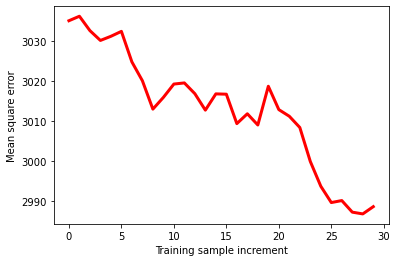

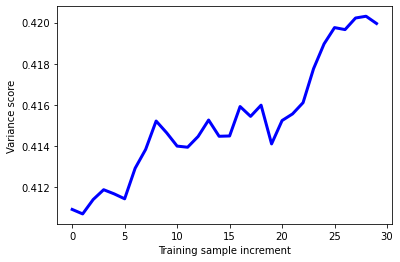

-0.01630489047352506
0.023395124182677564


In [6]:
#Question 1
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
Mean_Squared_Error=[]
Variance_Score=[]
for i in range(30):
    X_train=X[:-30+i]
    X_test=X[-30:]
    y_train=diabetes.target[:-30+i]
    y_test=diabetes.target[-30:]
    regr.fit(X_train, y_train)
    #print('Coefficients: \n', regr.coef_)
    #print('Intercept: \n', regr.intercept_)
    y_pred = regr.predict(X_test)
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    #print('Variance score: %.2f' % r2_score(y_test, y_pred))
    Mean_Squared_Error.append(mean_squared_error(y_test, y_pred))
    Variance_Score.append(r2_score(y_test, y_pred))
plt.plot( Mean_Squared_Error, color='red', linewidth=3)
plt.xlabel('Training sample increment')
plt.ylabel('Mean square error')
plt.show()
plt.plot( Variance_Score, color='blue', linewidth=3)
plt.xlabel('Training sample increment')
plt.ylabel('Variance score')
plt.show() 
print((min(Mean_Squared_Error)-max(Mean_Squared_Error))/max(Mean_Squared_Error))
print((max(Variance_Score)-min(Variance_Score))/min(Variance_Score))

(412, 8)


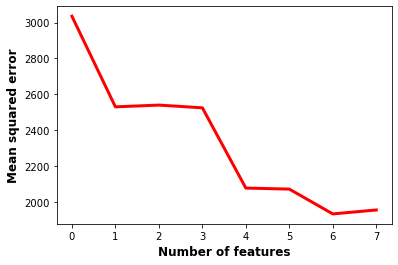

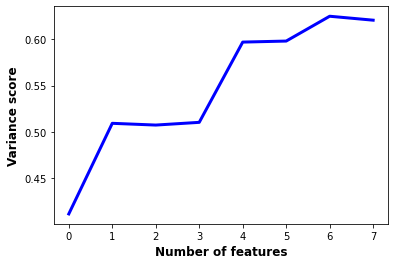

In [7]:
#Question 2
New_Mean_Squared_Error=[]
New_Variance_Score=[]
for i in range(3,11): 
    X_new=diabetes.data[:,2:i]  # bmi,bp,s1,s2,s3,s4,s5,s6
    X_new_train=X_new[:-30]
    X_new_test=X_new[-30:]
    y_train=diabetes.target[:-30]
    y_test=diabetes.target[-30:]
    #print(X_new_test.shape)
    #print(Xnouveau_train)
    #print(y_test.shape)
    #print(y_train.shape)
    regr.fit(X_new_train,y_train)
    y_pred=regr.predict(X_new_test)
    #print(y_pred.shape)
    #print('Coefficients: \n', regr.coef_)
    #print('Intercept: \n', regr.intercept_)
    #plt.scatter(Xnouveau_test[:,1], y_test, color='blue')
    #plt.plot(Xnouveau_test[:,1], y_pred, color='red', linewidth=3)
    New_Mean_Squared_Error.append(mean_squared_error(y_test, y_pred))
    New_Variance_Score.append(r2_score(y_test, y_pred))
print(X_new_train.shape)
#plt.scatter(X_new_test[:,np.newaxis,2],y_pred,color='red')
#plt.scatter(X_new_test[:,np.newaxis,2],y_test,color='blue')
#plt.show()
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.plot(New_Mean_Squared_Error, color='red', linewidth=3)
plt.xlabel('Number of features',fontweight='bold',fontsize=12)
plt.ylabel('Mean squared error',fontweight='bold',fontsize=12)
#plt.savefig('Mean_Squared_error_Vs_Number_of_features.png')
plt.show()
plt.plot(New_Variance_Score, color='blue', linewidth=3)
plt.xlabel('Number of features',fontweight='bold',fontsize=12)
plt.ylabel('Variance score',fontweight='bold',fontsize=12)
#plt.savefig('Varaince_Score_Vs_Number_of_features.png')
plt.show()

In [8]:
#dataset for classification
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

print(label_names)
print(labels.shape)
print(feature_names)
print(features.shape)
#print(data.DESCR)

['malignant' 'benign']
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


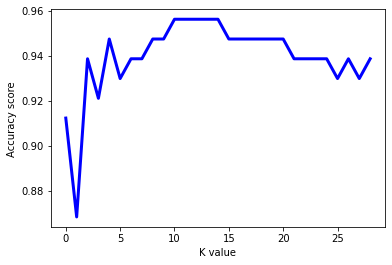

The maximum accuracy is 0.956140350877193 at K= 10


In [9]:
#Question 4
from sklearn.neighbors import KNeighborsClassifier
X2_new_train=features[:-228]
X2_valid=features[341:455]
X2_new_test=features[455:]
y2_new_train=labels[:-228]
y2_valid=labels[341:455]
y2_new_test=labels[455:]
#print(X2_new_train.shape)
#print(X2_valid.shape)
#print(X2_new_test.shape)
train_accuracy_score=[]
test_accuracy_score=[]
for i in range(1,30):
    knnClassifier = KNeighborsClassifier(n_neighbors=i)
    knnClassifier.fit(X2_new_train, y2_new_train)
    y2_new_pred_knn = knnClassifier.predict(X2_valid)
    train_accuracy_score.append(knnClassifier.score(X2_new_train, y2_new_train))
    test_accuracy_score.append(knnClassifier.score(X2_valid, y2_valid))
plt.plot(test_accuracy_score, color='blue', linewidth=3)
plt.xlabel('K value')
plt.ylabel('Accuracy score')
plt.show() 
print('The maximum accuracy is', max(test_accuracy_score),'at K=', test_accuracy_score.index(max(test_accuracy_score)))

In [10]:
#Question 6
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size = 0.40, random_state = 42)
knnClassifier = KNeighborsClassifier(n_neighbors=10)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
#Compute accuracy on the training set
Knn_train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
Knn_test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('Knn_train_accuracy',Knn_train_accuracy)
print('Knn_test_accuracy',Knn_test_accuracy)

from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)
Naive_Bayes_train_accuracy = gnbClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
Naive_Bayes_test_accuracy = gnbClassifier.score(X2_test, y2_test) 

print('Naive_Bayes_train_accuracy', Naive_Bayes_train_accuracy)
print('Naive_Bayes_test_accuracy',Naive_Bayes_test_accuracy)

Knn_train_accuracy 0.9237536656891495
Knn_test_accuracy 0.9824561403508771
Naive_Bayes_train_accuracy 0.9384164222873901
Naive_Bayes_test_accuracy 0.9517543859649122


In [11]:
#Question 7
from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)
#Compute accuracy on the training set
train_accuracy = gnbClassifier.score(X2_train, y2_train)
#Compute accuracy on the test set
test_accuracy = gnbClassifier.score(X2_test, y2_test) 
#print('train accuracy', train_accuracy)
#print('test accuracy',test_accuracy)
yprob = gnbClassifier.predict_proba(X2_test)
yprob[-228:].round(3)

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.257, 0.743],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.978, 0.022],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0. 

In [12]:
#Question 8
def my_confusion_matrix(x,y):
    TruePositive=0
    FalsePositive=0
    FalseNegative=0
    TrueNegative=0
    for i in range(0,len(x)):
        if x[i]==1 and y[i]==1:
            TruePositive=TruePositive+1
        elif x[i]==0 and y[i]==1:
            FalsePositive= FalsePositive+1
        elif x[i]==1 and y[i]==0:
            FalseNegative=FalseNegative+1
        else:
            TrueNegative=TrueNegative+1
    Matrix=np.asarray([TrueNegative,FalsePositive,FalseNegative,TruePositive])
    Matrix=np.reshape(Matrix,[2,2])
    return Matrix

In [13]:
#Question 8 
#comparison with the in-built score function confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knnClassifier = KNeighborsClassifier(n_neighbors=2)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
#print(y2_pred_knn.shape)
#print('test accuracy',test_accuracy)
#print(y2_pred_knn.shape)
print(confusion_matrix(y2_pred_knn,y2_test))
#print(y2_new_test)
print(my_confusion_matrix(y2_pred_knn,y2_test))
print(classification_report(y2_pred_knn,y2_test))
print(accuracy_score(y2_pred_knn,y2_test))

[[ 78  17]
 [  2 131]]
[[ 78  17]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        95
           1       0.89      0.98      0.93       133

    accuracy                           0.92       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228

0.9166666666666666


In [15]:
# Bonus Question
from sklearn.neighbors import KNeighborsRegressor
X = diabetes.data
Y = diabetes.target

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y,test_size = 0.20, random_state = 8)
k2 = 1

errors = []
for i in range (20):
    k2 +=i
    knnreg=KNeighborsRegressor(n_neighbors= k2, weights='uniform')
    knnreg.fit(X_train3, y_train3)
    knnreg.predict (X_test3)

    errors.append (knnreg.score(X_test3, y_test3))
print (errors)

[-0.19405228278735565, 0.31873445018945745, 0.42546541539831695, 0.4856175799644237, 0.46703988589749135, 0.45220966587463385, 0.45310502650891216, 0.4575538445403179, 0.46233841794186437, 0.45791034104882766, 0.4669897915837733, 0.4520513633854676, 0.44915337422392787, 0.43062335245944616, 0.41115857419361423, 0.39294948997085954, 0.37443838120284034, 0.35527865651356216, 0.32960817562045064, 0.29990913460041524]
